<a href="https://colab.research.google.com/github/alexandrazayy/Data-Structures-and-Algorithms/blob/main/Zaytseva_praktika8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from datetime import datetime
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import var4

#### данные я взяла тоже такие же как в 6 практике, где фигурки линии и +, тоже которые были в моем варианте

In [ ]:
data, labels = var4.gen_data()

In [ ]:
# Преобразуем строки меток в числа
label_mapping = {'Cross': 0, 'Line': 1}
labels = np.array([label_mapping[label[0]] for label in labels])

In [ ]:
# Преобразуем данные в формат, подходящий для сверточной нейронной сети
data = data.reshape((data.shape[0], 50, 50, 1))

In [ ]:
# Нормализуем данные
data = data.astype('float32') / 255.0

In [ ]:
# Перемешиваем данные
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [ ]:
# Разбиваем данные на обучающую и тестовую выборки
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

#### Я взяла исходный класс Callback для сохранения моделей из библиотеки тензор флоу, но внесла изменения, чтобы он работал в соответствии с заданием моего варианта

In [ ]:
class SaveModelCallback(tf.keras.callbacks.Callback):
    def __init__(self, prefix):
        super().__init__()  # Вызываем конструктор базового класса Callback
        self.prefix = prefix  # Устанавливаем префикс для имен файлов моделей

    def on_epoch_end(self, epoch, logs=None):
        # Сохраняем модель на заданных эпохах
        if epoch % save_interval == 0:
            model_name = f"{datetime.now().strftime('%Y-%m-%d')}_{self.prefix}_{epoch + 1}.h5"
            self.model.save(model_name)  # Сохраняем текущую модель
            print(f"Model saved at epoch {epoch + 1} with name {model_name}")


#### Моя модель из 6 практики:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())  # Добавлен Batch Normalization
model.add(layers.Dropout(0.7))  # Увеличен Dropout rate
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Задаем параметры для сохранения моделей
save_interval = 10  # Сохранять модели каждые 10 эпох
prefix = "mymodel"  # Префикс имени файла модели

In [ ]:
# Компилируем модель с уменьшенным learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Создаем Callback
save_model_callback = SaveModelCallback(prefix)

In [ ]:
model.fit(train_data, train_labels, epochs=150, validation_split=0.2, callbacks=[save_model_callback])

Epoch 1/150
10/10 [==============================] - 3s 108ms/step - loss: 0.6924 - accuracy: 0.5781 - val_loss: 0.6946 - val_accuracy: 0.3000
Epoch 2/150
 1/10 [==>...........................] - ETA: 0s - loss: 0.6909 - accuracy: 0.5938

C:\Users\sasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 1s 70ms/step - loss: 0.6902 - accuracy: 0.6469 - val_loss: 0.6958 - val_accuracy: 0.3000
Epoch 3/150
10/10 [==============================] - 1s 66ms/step - loss: 0.6874 - accuracy: 0.6687 - val_loss: 0.6974 - val_accuracy: 0.3000
Epoch 4/150
10/10 [==============================] - 1s 62ms/step - loss: 0.6849 - accuracy: 0.6375 - val_loss: 0.6989 - val_accuracy: 0.3000
Epoch 5/150
10/10 [==============================] - 1s 61ms/step - loss: 0.6809 - accuracy: 0.6781 - val_loss: 0.7003 - val_accuracy: 0.3000
Epoch 6/150
10/10 [==============================] - 1s 64ms/step - loss: 0.6750 - accuracy: 0.6781 - val_loss: 0.7019 - val_accuracy: 0.3000
Epoch 7/150
10/10 [==============================] - 1s 74ms/step - loss: 0.6665 - accuracy: 0.6438 - val_loss: 0.7025 - val_accuracy: 0.3000
Epoch 8/150
10/10 [==============================] - 1s 67ms/step - loss: 0.6551 - accuracy: 0.6781 - val_loss: 0.7036 - val_accuracy: 0.3000
Epoch 9/150
10/10 

In [ ]:
# Оцениваем модель на тестовых данных
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Точность модели на тест.данных: {test_acc}')

4/4 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 1.0000
Точность модели на тест.данных: 1.0


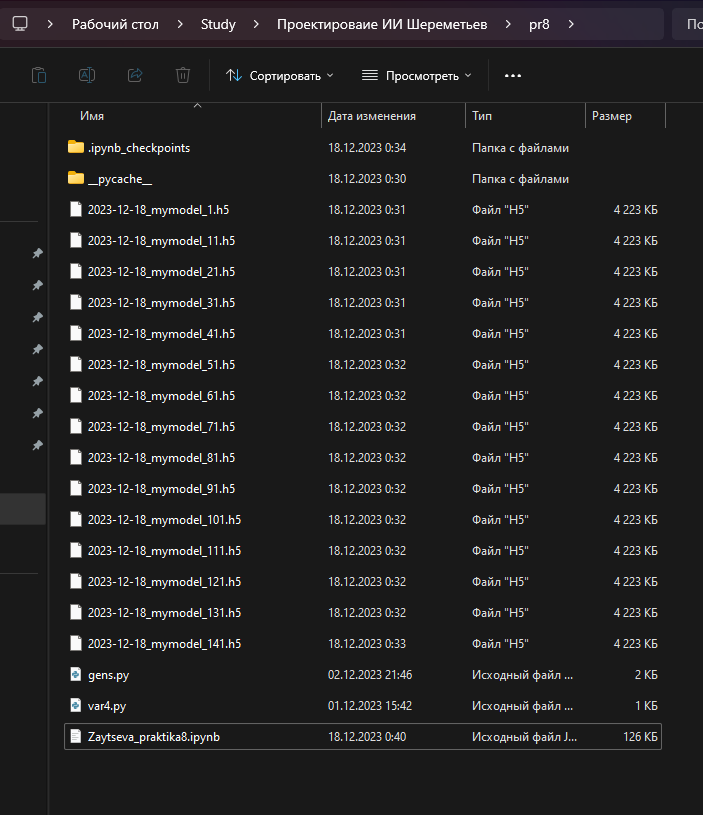

#### Кол бэк работает правильно, все модели сохранилось в правильном формате : <текущая дата>_<префикс, задаваемый пользователем>_<номер эпохи>